In [1]:
import pandas as pd 
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, balanced_accuracy_score, confusion_matrix


In [2]:
data=pd.read_excel('data_lineC_2.xlsx')

In [3]:
data_full=pd.read_parquet('full_data.parquet')

In [4]:
data_full

,SESSION_DATE,SniffTime,age,ReadTotalSnifftime,id_rat,rat_name,birth_date,gender,weight,temperature,id_sample,tb,hit,match_flag,SniffThreshold'
0,2016-11-03 00:00:00,0,2.0,None,98.0,Stephen,2014-07-21,M,NaN,30.5,515562,False,False,None,0.0
1,2016-11-03 00:00:00,0,2.0,None,98.0,Stephen,2014-07-21,M,NaN,30.5,515546,False,False,None,0.0
2,2016-11-03 00:00:00,0,2.0,None,98.0,Stephen,2014-07-21,M,NaN,30.5,515422,False,False,None,0.0
3,2016-11-03 00:00:00,0,2.0,None,98.0,Stephen,2014-07-21,M,NaN,30.5,515559,False,False,None,0.0
4,2016-11-03 00:00:00,0,2.0,None,98.0,Stephen,2014-07-21,M,NaN,30.5,515553,False,False,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240218,45565,220,NaN,True,NaN,Malaika,NaT,None,NaN,21.0,694768,False,False,None,0.0
240219,45565,442,NaN,True,NaN,Malaika,NaT,None,NaN,21.0,694740,False,False,None,0.0
240220,45565,151,NaN,True,NaN,Malaika,NaT,None,NaN,21.0,694628,False,False,None,0.0
240221,45565,517,NaN,True,NaN,Malaika,NaT,None,NaN,21.0,694832,False,False,None,0.0


In [42]:
labels = sorted(data_full['tb'].unique())  # Ensure consistent label order
person='Samiry'

# Compute confusion matrix
cm = confusion_matrix(data_full[data_full['rat_name'] == person]['tb'], data_full[data_full['rat_name'] == person]['hit'], labels=labels)


cm_df = pd.DataFrame(cm, index=[f"Actual: {label}" for label in labels],
                         columns=[f"Predicted: {label}" for label in labels])
print(cm_df)



           Predicted: 0  Predicted: 1
Actual: 0            65             0
Actual: 1             5             0


In [6]:
cm = confusion_matrix(data_full['tb'], data_full['hit'])
cm

array([[193352,  14353],
       [ 11017,  21501]])

In [7]:

def categorize_individuals(df):
    categories = {
        'high_recall': [],
        'high_specificity': [],
        'high_precision': [],
        'low_false_negative_rate': []
    }

    individuals = df['rat_name'].unique()

    for person in individuals:
        sub_df = df[df['rat_name'] == person]
        y_true = sub_df['tb']
        y_pred = sub_df['hit']

        # Compute confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0, 1]).ravel()

        # Compute metrics
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        false_negative_rate = fn / (fn + tp) if (fn + tp) > 0 else 1

        # Categorize based on thresholds
        if recall >= 0.8:
            categories['high_recall'].append(person)
        if specificity >= 0.8:
            categories['high_specificity'].append(person)
        if precision >= 0.8:
            categories['high_precision'].append(person)
        if false_negative_rate <= 0.2:
            categories['low_false_negative_rate'].append(person)

    return categories


In [8]:
categorize_individuals(data_full)

{'high_recall': ['Daudi', 'Doreen', 'Maui', 'Moureen', 'Rui'],
 'high_specificity': ['Stephen',
  'Catia',
  'Hakim',
  'Happy',
  'Pink',
  'Petrobas',
  'Mkuta',
  'Riziwani',
  'Julius',
  'Genovive',
  'Nala',
  'Maliwaza',
  'Daudi',
  'Doreen',
  'Kahu',
  'Maui',
  'Moana',
  'Moureen',
  'Ngaio',
  'Rui',
  'Samiry',
  'Ella',
  'Chilleta',
  'Tamasha',
  'Bertha',
  'Malaika',
  'Splinter',
  'Bieber',
  'Tivane',
  'Mayele',
  'Chamy',
  'Tirunesh',
  'Salvina',
  'Gea',
  'Orpheus',
  'Kenenisa'],
 'high_precision': [],
 'low_false_negative_rate': ['Daudi', 'Doreen', 'Maui', 'Moureen', 'Rui']}

In [9]:
data_full['rat_name'].unique()

array(['Stephen', 'Catia', 'Hakim', 'Happy', 'Pink', 'Petrobas', 'Mkuta',
       'Riziwani', 'Julius', 'Genovive', 'Nala', 'Maliwaza', 'Daudi',
       'Doreen', 'Kahu', 'Maui', 'Moana', 'Moureen', 'Ngaio', 'Rui',
       'Samiry', 'Ella', 'Chilleta', 'Tamasha', 'Bertha', 'Malaika',
       'Splinter', 'Bieber', 'Tivane', 'Mayele', 'Chamy', 'Tirunesh',
       'Salvina', 'Gea', 'Orpheus', 'Kenenisa'], dtype=object)

In [10]:

def compute_metrics_per_individual(df, ground_truth_col='tb', prediction_col='hit', individual_col='rat_name'):

    # Get unique individuals
    individuals = df[individual_col].unique()
    results = []

    for person in individuals:
        # Filter data for the individual
        person_df = df[df[individual_col] == person]

        # Extract ground truth and predictions
        y_true = person_df[ground_truth_col]
        y_pred = person_df[prediction_col]

        # Compute metrics
        precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
        accuracy = accuracy_score(y_true, y_pred)
        balanced_accuracy = balanced_accuracy_score(y_true, y_pred)

        # Append results
        results.append({
            'Individual': person,
            'Precision': round(precision, 3),
            'Recall': round(recall, 3),
            'F1 Score': round(f1, 3),
            'Accuracy': round(accuracy, 3),
            'Balanced Accuracy': round(balanced_accuracy, 3)
        })

    # Create a DataFrame for display
    metrics_df = pd.DataFrame(results)
    return metrics_df



In [11]:
compute_metrics_per_individual(data_full)    

,Individual,Precision,Recall,F1 Score,Accuracy,Balanced Accuracy
0,Stephen,0.854,0.835,0.843,0.835,0.702
1,Catia,0.867,0.830,0.844,0.830,0.744
2,Hakim,0.860,0.853,0.856,0.853,0.704
3,Happy,0.869,0.830,0.844,0.830,0.751
4,Pink,0.861,0.868,0.864,0.868,0.689
5,Petrobas,0.809,0.800,0.804,0.800,0.653
6,Mkuta,0.868,0.829,0.844,0.829,0.748
7,Riziwani,0.884,0.816,0.838,0.816,0.795
8,Julius,0.828,0.825,0.826,0.825,0.629
9,Genovive,0.865,0.847,0.855,0.847,0.728


In [35]:

from sklearn.preprocessing import LabelEncoder

def cluster_individuals(df, ground_truth_col='tb', prediction_col='hit', individual_col='rat_name'):
    # Encode labels if they are not binary
    le = LabelEncoder()
    df[ground_truth_col] = le.fit_transform(df[ground_truth_col])
    df[prediction_col] = le.transform(df[prediction_col])

    # Initialize metrics storage
    metrics = []

    # Compute metrics per individual
    for name, group in df.groupby(individual_col):
        y_true = group[ground_truth_col]
        y_pred = group[prediction_col]

        # Confusion matrix: TN, FP, FN, TP
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0, 1]).ravel()

        # Avoid division by zero
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        fn_rate = fn / (fn + tp) if (fn + tp) > 0 else 0
        fp_rate = fp / (fp + tn) if (fp + tn) > 0 else 0

        metrics.append({
            'rat_name': name,
            'false_negative_rate': fn_rate,
            'false_positive_rate': fp_rate,
            'precision': precision
        })

    # Create DataFrame
    metrics_df = pd.DataFrame(metrics)

    # Normalize metrics for clustering
    norm_df = metrics_df[['false_negative_rate', 'false_positive_rate', 'precision']]
    norm_df = (norm_df - norm_df.min()) / (norm_df.max() - norm_df.min())

    # Assign clusters based on best performance
    clusters = []
    for _, row in norm_df.iterrows():
        if row['false_negative_rate'] <= row['false_positive_rate'] and row['false_negative_rate'] <= (1 - row['precision']):
            clusters.append('Minimize False Negative')
        elif row['false_positive_rate'] <= row['false_negative_rate'] and row['false_positive_rate'] <= (1 - row['precision']):
            clusters.append('Minimize False Positive')
        else:
            clusters.append('Maximize Precision')

    metrics_df['cluster'] = clusters

    # Display results
    print("Individual Clustering Based on Prediction Performance:\n")
    print(metrics_df[['rat_name', 'cluster']].to_string(index=False))
    return metrics_df[['rat_name', 'cluster']]


In [36]:
clusters=cluster_individuals(data_full)
clusters

Individual Clustering Based on Prediction Performance:

rat_name                 cluster
  Bertha Minimize False Negative
  Bieber Minimize False Negative
   Catia Minimize False Negative
   Chamy      Maximize Precision
Chilleta Minimize False Negative
   Daudi Minimize False Negative
  Doreen Minimize False Negative
    Ella Minimize False Negative
     Gea      Maximize Precision
Genovive Minimize False Negative
   Hakim Minimize False Negative
   Happy Minimize False Negative
  Julius      Maximize Precision
    Kahu Minimize False Negative
Kenenisa Minimize False Negative
 Malaika Minimize False Negative
Maliwaza Minimize False Negative
    Maui Minimize False Negative
  Mayele      Maximize Precision
   Mkuta Minimize False Negative
   Moana Minimize False Positive
 Moureen Minimize False Negative
    Nala Minimize False Negative
   Ngaio Minimize False Positive
 Orpheus      Maximize Precision
Petrobas Minimize False Negative
    Pink      Maximize Precision
Riziwani Minimize Fa

,rat_name,cluster
0,Bertha,Minimize False Negative
1,Bieber,Minimize False Negative
2,Catia,Minimize False Negative
3,Chamy,Maximize Precision
4,Chilleta,Minimize False Negative
5,Daudi,Minimize False Negative
6,Doreen,Minimize False Negative
7,Ella,Minimize False Negative
8,Gea,Maximize Precision
9,Genovive,Minimize False Negative


In [40]:
clusters

,rat_name,cluster
0,Bertha,Minimize False Negative
1,Bieber,Minimize False Negative
2,Catia,Minimize False Negative
3,Chamy,Maximize Precision
4,Chilleta,Minimize False Negative
5,Daudi,Minimize False Negative
6,Doreen,Minimize False Negative
7,Ella,Minimize False Negative
8,Gea,Maximize Precision
9,Genovive,Minimize False Negative


In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


def compute_fpr_fnr_with_clusters(df, cluster_df, ground_truth_col='tb', prediction_col='hit', individual_col='rat_name', cluster_col='cluster'):
    individuals = df[individual_col].unique()
    metrics = []

    # Ensure cluster_df has the correct columns
    cluster_df = cluster_df[[individual_col, cluster_col]]

    for person in individuals:
        person_df = df[df[individual_col] == person]
        y_true = person_df[ground_truth_col]
        y_pred = person_df[prediction_col]

        # Compute confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0, 1]).ravel()

        # Compute FPR and FNR
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
        fnr = fn / (fn + tp) if (fn + tp) > 0 else 0

        # Get cluster from cluster_df
        cluster_row = cluster_df[cluster_df[individual_col] == person]
        cluster = cluster_row[cluster_col].iloc[0] if not cluster_row.empty else 'Unknown'

        metrics.append({'individual': person, 'FPR': fpr, 'FNR': fnr, 'cluster': cluster})

    return pd.DataFrame(metrics)

# Example usage with a DataFrame named df
# df should contain columns: 'tb', 'hit', 'rat_name', 'cluster'
metrics_df = compute_fpr_fnr_with_clusters(data_full,clusters)

# Plotting function
def plot_fpr_fnr(metrics_df):
    plt.figure(figsize=(10, 8))
    clusters = metrics_df['cluster'].unique()
    colors = plt.cm.get_cmap('tab10', len(clusters))

    for idx, cluster in enumerate(clusters):
        cluster_df = metrics_df[metrics_df['cluster'] == cluster]
        plt.scatter(cluster_df['FPR'], cluster_df['FNR'], label=cluster, color="orange")

    for _, row in metrics_df.iterrows():
        plt.text(row['FPR'], row['FNR'], row['individual'], fontsize=8, ha='right')

    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('False Negative Rate (FNR)')
    plt.title('Individual Performance: FPR vs FNR by Cluster')
    plt.xlim(left=-0.01, right=0.7)
    plt.ylim(bottom=-0.01)
    #plt.legend(title='Cluster')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("individual_fpr_fnr_cluster_plot.png")
    plt.show()




C:\Users\NicolaCiotti\AppData\Local\Temp\ipykernel_3336\2220783531.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(clusters))


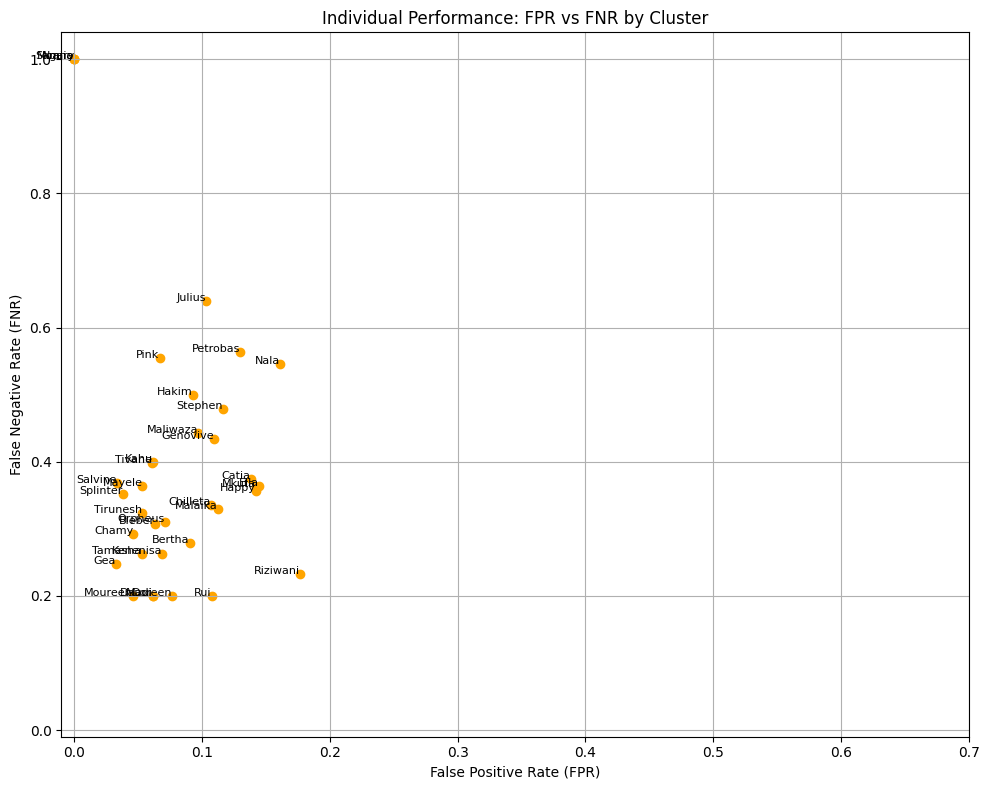

In [58]:
plot_fpr_fnr(metrics_df)
#metrics_df